In [1]:
import folium
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt 
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

import warnings
pd.set_option('max_columns', None)
pd.set_option('display.float_format', str)
warnings.filterwarnings('ignore')
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams["axes.edgecolor"] = "black"

# EDA notebook

Mainly exploring the data and visualizing for use later 

## Dataset initial exploration

In [2]:
df = pd.read_csv('datasets\cleaned.csv')

In [3]:
df.head(5)

neighborhood  latitude  longitude    price  size_in_sqft  \
0   NAKHLAT JUMEIRA 25.113208  55.138932  2700000          1079   
1   NAKHLAT JUMEIRA 25.106809  55.151201  2850000          1582   
2  AL THANYAH FIFTH 25.063302  55.137728  1150000          1951   
3          AL JADAF 25.227295  55.341761  2850000          2020   
4   NAKHLAT JUMEIRA 25.114275  55.139764  1729200           507   

   price_per_sqft  no_of_bedrooms  no_of_bathrooms  quality  maid_room  \
0         2502.32               1                2        1          0   
1         1801.52               2                2        1          0   
2          589.44               3                5        1          1   
3         1410.89               2                3        0          0   
4         3410.65               0                1        1          0   

   unfurnished  balcony  barbecue_area  built_in_wardrobes  central_ac  \
0            0        1              1                   0           1   
1            0        1              0                   1           1   
2            1        1              0                   1           0   
3            1        1              0                   0           0   
4            0        0              0                   1           1   

   childrens_play_area  childrens_pool  concierge  covered_parking  \
0                    1               0          1                0   
1                    1               0          0                0   
2                    0               0          0                1   
3                    0               0          1                1   
4                    0               0          0                1   

   kitchen_appliances  lobby_in_building  maid_service  networked  \
0                   1                  0             0          0   
1                   0                  0             0          0   
2                   0                  0             0          0   
3                   0                  0             0          0   
4                   1                  0             0          1   

   pets_allowed  private_garden  private_gym  private_jacuzzi  private_pool  \
0             1               0            0                0             0   
1             0               0            0                0             0   
2             0               0            0                1             0   
3             1               0            0                0             0   
4             0               0            0                0             0   

   security  shared_gym  shared_pool  shared_spa  study  vastu_compliant  \
0         0           1            0           0      0                0   
1         0           1            1           0      0                0   
2         1           1            1           0      0                0   
3         0           0            0           0      0                0   
4         1           1            1           1      0                0   

   view_of_landmark  view_of_water  walk_in_closet  num_venues  \
0                 0              1               0          99   
1                 0              1               0          99   
2                 1              1               1          51   
3                 0              0               0          18   
4                 1              1               0          99   

        venue_senti  population_density  num_stations  
0 8.488888888888889   914.2330830451072             0  
1 8.488888888888889   914.2330830451072             0  
2  8.21764705882353   4178.052207612604             2  
3               8.0   704.9373846101159             1  
4 8.488888888888889   914.2330830451072             0

In [4]:
df.columns

Index(['neighborhood', 'latitude', 'longitude', 'price', 'size_in_sqft',
       'price_per_sqft', 'no_of_bedrooms', 'no_of_bathrooms', 'quality',
       'maid_room', 'unfurnished', 'balcony', 'barbecue_area',
       'built_in_wardrobes', 'central_ac', 'childrens_play_area',
       'childrens_pool', 'concierge', 'covered_parking', 'kitchen_appliances',
       'lobby_in_building', 'maid_service', 'networked', 'pets_allowed',
       'private_garden', 'private_gym', 'private_jacuzzi', 'private_pool',
       'security', 'shared_gym', 'shared_pool', 'shared_spa', 'study',
       'vastu_compliant', 'view_of_landmark', 'view_of_water',
       'walk_in_closet', 'num_venues', 'venue_senti', 'population_density',
       'num_stations'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1844 entries, 0 to 1843
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighborhood         1844 non-null   object 
 1   latitude             1844 non-null   float64
 2   longitude            1844 non-null   float64
 3   price                1844 non-null   int64  
 4   size_in_sqft         1844 non-null   int64  
 5   price_per_sqft       1844 non-null   float64
 6   no_of_bedrooms       1844 non-null   int64  
 7   no_of_bathrooms      1844 non-null   int64  
 8   quality              1844 non-null   int64  
 9   maid_room            1844 non-null   int64  
 10  unfurnished          1844 non-null   int64  
 11  balcony              1844 non-null   int64  
 12  barbecue_area        1844 non-null   int64  
 13  built_in_wardrobes   1844 non-null   int64  
 14  central_ac           1844 non-null   int64  
 15  childrens_play_area  1844 non-null   i

## The target column (Y)

In [6]:
# General statistics
df['price'].describe()

count               1844.0
mean    2107441.4446854666
std     2949678.5712087657
min               220000.0
25%               900000.0
50%              1425000.0
75%              2200000.0
max             35000000.0
Name: price, dtype: float64

Skewness: 6.096520
Kurtosis: 47.792884


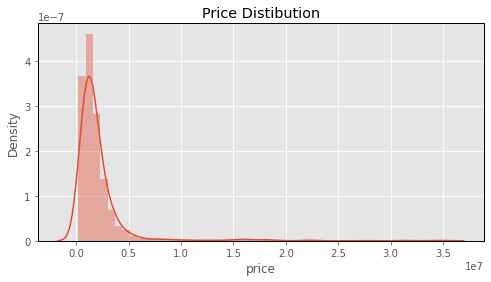

In [7]:
# Distribution
sns.distplot(df['price'])
plt.title('Price Distibution')

print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

## Numerical relationships

Text(0.5, 1.0, 'Price against size (sqr foot)')

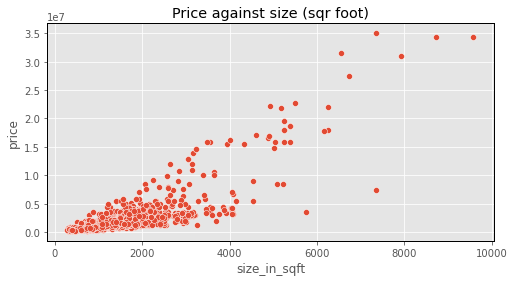

In [8]:
# Plotting price relationships
sns.scatterplot(data = df, y = 'price', x = 'size_in_sqft')
plt.title('Price against size (sqr foot)')

Text(0.5, 1.0, 'Price against #bedrooms')

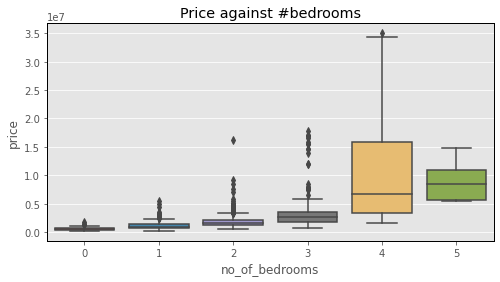

In [9]:
sns.boxplot(data = df, y = 'price', x = 'no_of_bedrooms')
plt.title('Price against #bedrooms')

Text(0.5, 1.0, 'Price against # bathrooms')

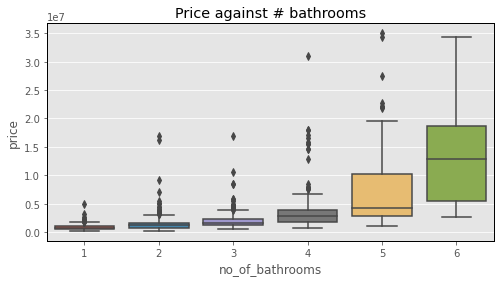

In [10]:
sns.boxplot(data = df, y = 'price', x = 'no_of_bathrooms')
plt.title('Price against # bathrooms')

Text(0.5, 1.0, 'Price against quality')

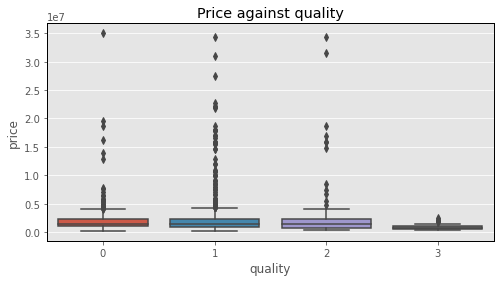

In [11]:
# This doesn't make any sense. The quality column must be bunk.
sns.boxplot(data = df, y = 'price', x = 'quality')
plt.title('Price against quality')

### Check categorical

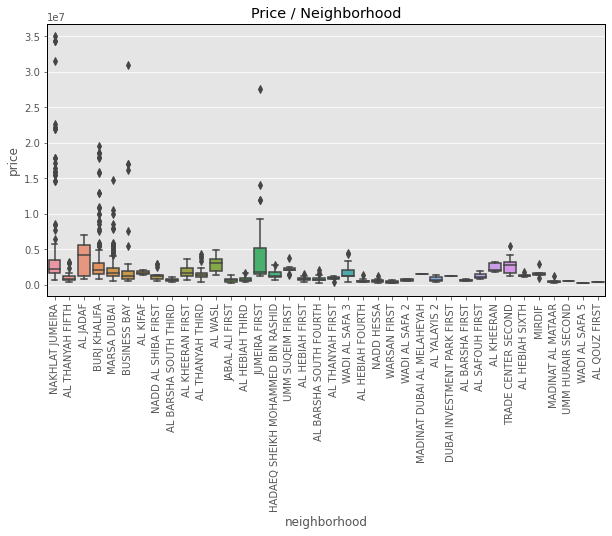

In [12]:
plt.subplots(figsize=(10, 5))
sns.boxplot(data = df, y = 'price', x = 'neighborhood')
plt.title('Price / Neighborhood')
plt.xticks(rotation = 90)
plt.show()

## Check booleans

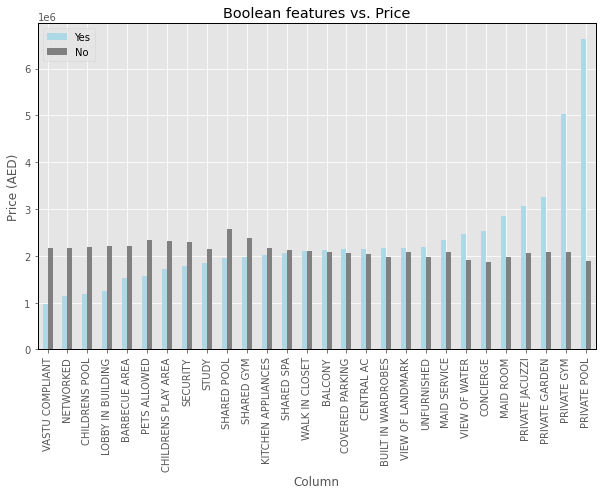

In [13]:
# Columns with boolean values. 
bool_cols = ['maid_room', 'unfurnished', 'balcony', 'barbecue_area',
       'built_in_wardrobes', 'central_ac', 'childrens_play_area',
       'childrens_pool', 'concierge', 'covered_parking', 'kitchen_appliances',
       'lobby_in_building', 'maid_service', 'networked', 'pets_allowed',
       'private_garden', 'private_gym', 'private_jacuzzi', 'private_pool',
       'security', 'shared_gym', 'shared_pool', 'shared_spa', 'study',
       'vastu_compliant', 'view_of_landmark', 'view_of_water',
       'walk_in_closet']

# Making new dataframe to make plotting Bool columns easier
df_boolplot = pd.DataFrame({
    
'Column':[name.replace('_',' ').upper() for name in bool_cols],
'Yes':[df.loc[df[col] == 1]['price'].mean() for col in bool_cols],
'No':[df.loc[df[col] == 0]['price'].mean() for col in bool_cols]  
})

plt.rcParams["axes.edgecolor"] = "black"
df_boolplot.sort_values(by = ['Yes']).plot(x = 'Column',
                kind = 'bar',
                stacked = False,
                title = 'Boolean features vs. Price',
                figsize = (10,6),
                color = ['lightblue', 'gray'])
plt.ylabel('Price (AED)')
plt.show()

## Check correlations

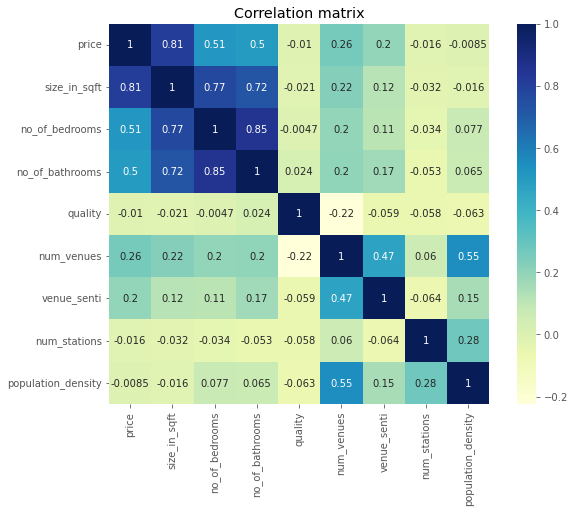

In [17]:
# Numerical columns
# Yes most are numeric but I want to ignore encoded values
num_cols = [ 'price', 'size_in_sqft','no_of_bedrooms',
            'no_of_bathrooms', 'quality','num_venues',
            'venue_senti', 'num_stations','population_density']

plt.subplots(figsize=(10, 7))
sns.heatmap(df[num_cols].corr(), square=True, annot = True,cmap="YlGnBu")
plt.title('Correlation matrix')
plt.show()

Price is extremely strongly correlated with the size of the apartment. 

## Plotting locations of the sales

This doesn't serve any purpose besides dataviz

In [15]:
# Load the other two datasets
df_venue = pd.read_csv('datasets\\neighbourhood_data\\dubai_venues.csv')
df_metro = pd.read_csv('datasets\\neighbourhood_data\\metro_venues_total.csv')

In [16]:
# create map object
map_dubai = folium.Map(location = [25.113208,55.138932],
                       zoom_start = 11, 
                       tiles='cartodbpositron',
                       width=640,
                       height=480)


# Add apartment dots to map
for cord in ((df['latitude'][i],df['longitude'][i]) for i in range(df.shape[0])):
    folium.CircleMarker(cord,
                        radius = 1,
                        color = '#0080bb',
                        fill_color = '#0080bb').add_to(map_dubai) 
    
# Add venue dots to map
for cord in ((df_venue['Community Latitude'][i],df_venue['Community Longitude'][i]) for i in range(df_venue.shape[0])):
    folium.CircleMarker(cord,
                        radius = 1,
                        color = '#10EB74',
                        fill_color = '#10EB74').add_to(map_dubai) 
    
# Add metro station dots to map
for cord in ((df_metro['latitude'][i],df_metro['longitude'][i]) for i in range(df_metro.shape[0])):
    folium.CircleMarker(cord,
                        radius = 1,
                        color = '#DCE21B',
                        fill_color = '#DCE21B').add_to(map_dubai) 
    
# Blue - Apartment
# Green - Venue
# Yellow = Metro station
map_dubai

Should probably encode neighborhoods into categorical feature for clustering. 

## Plotting heatmap